In [1]:

import random
import warnings

import cv2
import numpy as np
from keras import layers, models
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [2]:
class CNN:
    @staticmethod
    def build(width, height, depth, classes):
        model = models.Sequential()
        inputShape = (height, width, depth)
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=inputShape))
        # model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(2, 2))     
        model.add(layers.Dropout(0.2))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        # model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(2, 2))
        model.add(layers.Dropout(0.2))
        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
        # model.add(layers.BatchNormalization())
        model.add(layers.Dense(classes, activation='softmax'))
        return model

In [3]:
from keras.src.callbacks import EarlyStopping

def train_cnn(train_images, train_labels, val_images=np.array([]), val_labels=np.array([]), epochs=5):
    model = CNN.build(width=120, height=400, depth=1, classes=8)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])  #98.97 - adam 99.23 - rmsprop
    model.summary()
    early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True)
    if val_images.size != 0 and val_labels.size != 0:
        model.fit(train_images, train_labels, epochs=epochs, batch_size=32, validation_data=(val_images, val_labels), callbacks=[early_stopping_monitor])
    else:
        model.fit(train_images, train_labels, epochs=epochs, batch_size=32, callbacks=[early_stopping_monitor])
    return model

In [4]:
def evalute_cnn(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'[INFO] Loss:{test_loss:.4f} Test accuracy: {(test_acc * 100):.4f}')

In [5]:
def calculate_f1_score(model, test_images, test_labels):
    test_prob = model.predict(test_images)
    test_pred = test_prob.argmax(axis=-1)
    f1 = f1_score(test_labels, test_pred, average='weighted')
    print(f'[INFO] F1-Score is:{f1:.4f}')
    return f1

In [6]:
def get_numpy_array_for_image(image_path):
    # print(image_path)
    img = cv2.imread(image_path)

    img_transformed = img[:, :, :1]

    img_transformed = 255 - img_transformed

    img_final = np.squeeze(img_transformed, axis=2)

    return img_final

In [7]:
import pandas as pd


def csv_to_array(file_path):
    df = pd.read_csv(file_path)
    return np.array(list(df['data_labels']))

In [8]:
import os

current_directory = os.getcwd()

os.chdir("D:/Pycharm Projects")

train_folder = rf"ThesisFinalData\larger_scaled_images_rolling_window_6_limit_50\train"

train_images = []

train_images_list = os.listdir(fr'{train_folder}\images')
train_images_list.sort(key=lambda x: int(x.split('_')[1]))

index = 0
for index, img in enumerate(train_images_list):
    print(index)
    index += 1
    train_images.append(get_numpy_array_for_image(rf'{train_folder}\images\{img}'))

train_images = np.array(train_images)

train_labels = csv_to_array(f'{train_folder}/train_data_labels_absolute_8_limit_50.csv')

test_folder = rf"ThesisFinalData\larger_scaled_images_rolling_window_6_limit_50\test"

test_images = []

test_images_list = os.listdir(fr'{test_folder}\images')
test_images_list.sort(key=lambda x: int(x.split('_')[1]))

index = 0
for index, img in enumerate(test_images_list):
    print(index)
    index += 1
    test_images.append(get_numpy_array_for_image(rf'{test_folder}\images\{img}'))

test_images = np.array(test_images)

test_labels = csv_to_array(f'{test_folder}/test_data_labels_absolute_8_limit_50.csv')

# os.chdir(current_directory)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [9]:
num_train_images = len(train_images)
print(f"number of training images: {num_train_images}")
train_images_order = list(range(num_train_images))
random.shuffle(train_images_order)
print(f"train images order {train_images_order}")
print(f"train images initial {train_images}")
print(f"train labels initial {train_labels}")
train_images = train_images[train_images_order]
train_labels = train_labels[train_images_order]
print(f"train images shuffled {train_images}")
print(f"train labels shuffled {train_labels}")

number of training images: 15439
train images order [206, 3220, 2757, 7914, 6014, 14218, 9715, 9587, 2005, 6188, 6094, 4624, 14830, 13753, 11941, 3375, 1587, 7148, 14308, 8663, 3991, 12707, 7501, 5589, 7533, 4803, 5127, 11002, 13985, 14677, 1675, 9191, 3948, 9567, 6976, 9740, 6498, 5840, 14763, 5461, 9222, 7736, 12450, 14904, 8425, 3597, 14235, 10951, 12820, 1133, 14329, 15335, 9691, 1157, 7629, 7581, 13453, 1536, 12643, 4852, 2007, 3800, 3770, 2395, 13321, 10241, 13472, 3467, 14948, 1176, 10264, 6419, 7038, 3072, 9801, 15058, 516, 14379, 11466, 4947, 3850, 8348, 4283, 4501, 2741, 6396, 1928, 2495, 4328, 9112, 4798, 3435, 7580, 15356, 7144, 2709, 8794, 10752, 3658, 10590, 7405, 5276, 8886, 5985, 6690, 8443, 4460, 8427, 11613, 4529, 6604, 4504, 14070, 14718, 15344, 8469, 4684, 12030, 9850, 1891, 9904, 14167, 2147, 12983, 7514, 6790, 2614, 2942, 3121, 9393, 8619, 15361, 13781, 5664, 15131, 4071, 9507, 11269, 5124, 2355, 12435, 5048, 10939, 9187, 5071, 10160, 5837, 6177, 5089, 12140, 1305

In [10]:
print(f"number of training images: {len(train_images)}")
print(f"number of testing images: {len(test_images)}")

number of training images: 15439
number of testing images: 3860


In [11]:
print(f"number of training data labels {len(train_labels)}")
print(f"number of training data labels {len(test_labels)}")

number of training data labels 15439
number of training data labels 3860


In [12]:
all_images_folder = rf"ThesisFinalData\larger_scaled_images_rolling_window_6_limit_50\all images"
all_grayscale_images = {file for file in os.listdir(all_images_folder) if file.endswith('grayscale.png')}

print(f"number of all images: {len(all_grayscale_images)}")
train_plus_test_set = set(train_images_list + test_images_list)
print(train_plus_test_set - all_grayscale_images)
assert train_plus_test_set == all_grayscale_images


number of all images: 19299
set()


In [13]:
print("image shape: ", train_images[0].shape)
print("label: ", train_labels[0])
train_images[0]

image shape:  (400, 120)
label:  3.0


array([[  6,   6,   6, ...,   6,   6,   6],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [109, 109, 109, ..., 109, 109, 109]], dtype=uint8)

In [14]:
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 400, 120, 1)
test_images = test_images.reshape(test_images.shape[0], 400, 120, 1)

train_images, test_images = train_images / 255, test_images / 255

train_images = train_images.astype('float16')
test_images = test_images.astype('float16')


In [15]:
del all_grayscale_images
del train_plus_test_set
del train_images_list
del test_images_list

In [16]:
train_images

array([[[[0.02353],
         [0.02353],
         [0.02353],
         ...,
         [0.02353],
         [0.02353],
         [0.02353]],

        [[0.     ],
         [0.     ],
         [0.     ],
         ...,
         [0.     ],
         [0.     ],
         [0.     ]],

        [[0.     ],
         [0.     ],
         [0.     ],
         ...,
         [0.     ],
         [0.     ],
         [0.     ]],

        ...,

        [[0.     ],
         [0.     ],
         [0.     ],
         ...,
         [0.     ],
         [0.     ],
         [0.     ]],

        [[0.     ],
         [0.     ],
         [0.     ],
         ...,
         [0.     ],
         [0.     ],
         [0.     ]],

        [[0.4275 ],
         [0.4275 ],
         [0.4275 ],
         ...,
         [0.4275 ],
         [0.4275 ],
         [0.4275 ]]],


       [[[0.02353],
         [0.02353],
         [0.02353],
         ...,
         [0.02353],
         [0.02353],
         [0.02353]],

        [[0.     ],
         [0.

In [17]:
train_images[0]

array([[[0.02353],
        [0.02353],
        [0.02353],
        ...,
        [0.02353],
        [0.02353],
        [0.02353]],

       [[0.     ],
        [0.     ],
        [0.     ],
        ...,
        [0.     ],
        [0.     ],
        [0.     ]],

       [[0.     ],
        [0.     ],
        [0.     ],
        ...,
        [0.     ],
        [0.     ],
        [0.     ]],

       ...,

       [[0.     ],
        [0.     ],
        [0.     ],
        ...,
        [0.     ],
        [0.     ],
        [0.     ]],

       [[0.     ],
        [0.     ],
        [0.     ],
        ...,
        [0.     ],
        [0.     ],
        [0.     ]],

       [[0.4275 ],
        [0.4275 ],
        [0.4275 ],
        ...,
        [0.4275 ],
        [0.4275 ],
        [0.4275 ]]], dtype=float16)

In [18]:
train_labels

array([3., 4., 4., ..., 1., 4., 2.])

In [19]:
print(list(train_labels).count(0))

309


In [20]:
test_labels

array([4., 5., 4., ..., 4., 3., 4.])

In [21]:
print(test_labels[-3:])

[4. 3. 4.]


In [22]:
train_images_dummy = train_images[:9]
test_images_dummy = train_images[:9]
train_labels_dummy = train_labels[:9]
test_labels_dummy = train_labels[:9]
print(train_images_dummy)
print(train_labels_dummy)
print(test_images_dummy)
print(test_labels_dummy)

[[[[0.02353]
   [0.02353]
   [0.02353]
   ...
   [0.02353]
   [0.02353]
   [0.02353]]

  [[0.     ]
   [0.     ]
   [0.     ]
   ...
   [0.     ]
   [0.     ]
   [0.     ]]

  [[0.     ]
   [0.     ]
   [0.     ]
   ...
   [0.     ]
   [0.     ]
   [0.     ]]

  ...

  [[0.     ]
   [0.     ]
   [0.     ]
   ...
   [0.     ]
   [0.     ]
   [0.     ]]

  [[0.     ]
   [0.     ]
   [0.     ]
   ...
   [0.     ]
   [0.     ]
   [0.     ]]

  [[0.4275 ]
   [0.4275 ]
   [0.4275 ]
   ...
   [0.4275 ]
   [0.4275 ]
   [0.4275 ]]]


 [[[0.02353]
   [0.02353]
   [0.02353]
   ...
   [0.02353]
   [0.02353]
   [0.02353]]

  [[0.     ]
   [0.     ]
   [0.     ]
   ...
   [0.     ]
   [0.     ]
   [0.     ]]

  [[0.     ]
   [0.     ]
   [0.     ]
   ...
   [0.     ]
   [0.     ]
   [0.     ]]

  ...

  [[0.     ]
   [0.     ]
   [0.     ]
   ...
   [0.     ]
   [0.     ]
   [0.     ]]

  [[0.     ]
   [0.     ]
   [0.     ]
   ...
   [0.     ]
   [0.     ]
   [0.     ]]

  [[0.4275 ]
   [0.4275 ]
 

In [23]:
# model = train_cnn(train_images_dummy,train_labels_dummy,test_images_dummy,test_labels_dummy, epochs = 5)
# print(model.predict(test_images_dummy))
# evalute_cnn(model,test_images_dummy,test_labels_dummy)
# calculate_f1_score(model,test_images_dummy,test_labels_dummy)
model = train_cnn(train_images, train_labels, test_images, test_labels, epochs=5)
# model = train_cnn(train_images,train_labels)
evalute_cnn(model, test_images, test_labels)
calculate_f1_score(model, test_images, test_labels)

D:\Pycharm Projects\ThesisFinal\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
483/483 ━━━━━━━━━━━━━━━━━━━━ 343s 708ms/step - accuracy: 0.3254 - loss: 1.6539 - val_accuracy: 0.3461 - val_loss: 1.5635
Epoch 2/5
483/483 ━━━━━━━━━━━━━━━━━━━━ 298s 617ms/step - accuracy: 0.3691 - loss: 1.5507 - val_accuracy: 0.3552 - val_loss: 1.5610
Epoch 3/5
483/483 ━━━━━━━━━━━━━━━━━━━━ 296s 613ms/step - accuracy: 0.4057 - loss: 1.4816 - val_accuracy: 0.3453 - val_loss: 1.5869
Epoch 4/5
483/483 ━━━━━━━━━━━━━━━━━━━━ 291s 603ms/step - accuracy: 0.4608 - loss: 1.3229 - val_accuracy: 0.3207 - val_loss: 1.7183
Epoch 5/5
483/483 ━━━━━━━━━━━━━━━━━━━━ 292s 604ms/step - accuracy: 0.5613 - loss: 1.0903 - val_accuracy: 0.2972 - val_loss: 1.9593
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 142ms/step - accuracy: 0.3805 - loss: 1.4944
[INFO] Loss:1.5610 Test accuracy: 35.5181
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step
[INFO] F1-Score is:0.2824


0.2824043679972528

In [24]:
model_predictions = model.predict(test_images)

121/121 ━━━━━━━━━━━━━━━━━━━━ 19s 158ms/step


In [25]:
predicted_test_labels = []

for row in model_predictions:
    max_value_in_row = max(row)
    predicted_test_label = list(row).index(max_value_in_row)
    predicted_test_labels.append(predicted_test_label)

predicted_test_labels

[4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,


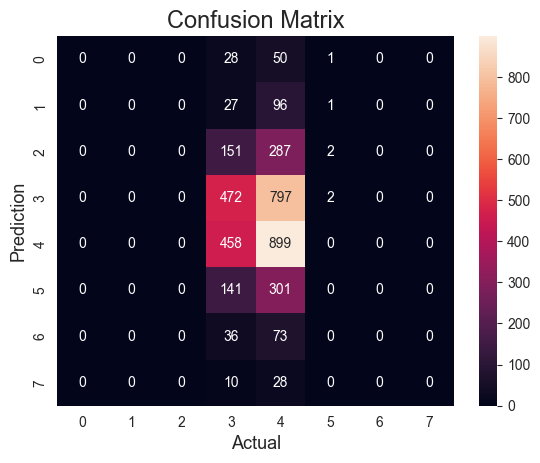

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predicted_test_labels)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[0, 1, 2, 3, 4, 5, 6, 7],
            yticklabels=[0, 1, 2, 3, 4, 5, 6, 7])
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Predicted', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()
# Why are these values different from the ones calculated above ?

# TP - predicted 3,4 actual 3,4 = 4655
# TN - predicted 0,1,2,5,6,7 actual 0,1,2,5,6,7 = 74 + 70 + 129 + 98 = 371
# FP - predicted 3,4 actual 0,1,2,5,6,7 = 89 + 167 = 256
# FN - predicted 0,1,2,5,6,7 actual 3,4 = 1768 + 1849 = 3617

# total = 4655 + 371 + 256 + 3617 = 8899

# accuracy = (4655 + 371) / 8899 = 0.56
# recall = 4655 / (4655 + 3617) = 0.56
# F1 = 2 * (0.56 * 0.56) / (0.56 + 0.56) = 0.56

In [27]:
def crossover(c1, c2, min_width=1, h_lower_bound=2, h_upper_bound=10):
    height, width, depth = c1.shape
    start_h = np.random.randint(1, height // 2 + 1)
    end_h = np.random.randint(start_h + h_lower_bound, min(start_h + h_upper_bound, height))
    start_w = np.random.randint(0, width - min_width)
    end_w = np.random.randint(start_w + min_width, width)
    c1_sliced = c1.copy()
    c2_sliced = c2.copy()
    c1_sliced[start_h:end_h, start_w:end_w, :] = c2[start_h:end_h, start_w:end_w, :]
    c2_sliced[start_h:end_h, start_w:end_w, :] = c1[start_h:end_h, start_w:end_w, :]
    return c1_sliced, c2_sliced

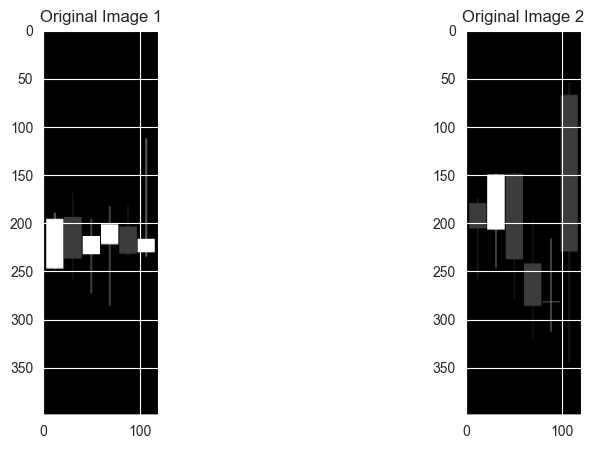

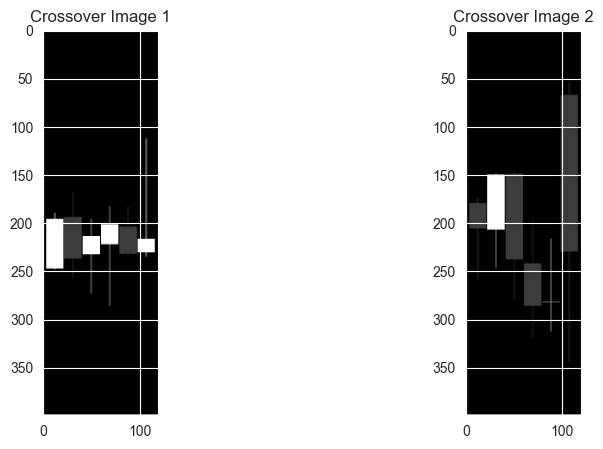

In [28]:
org1 = train_images[np.random.randint(0, len(train_images))]
org2 = train_images[np.random.randint(0, len(train_images))]
c1_crossover, c2_crossover = crossover(org1, org2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(org1.squeeze(), cmap='gray')
plt.title('Original Image 1')
plt.subplot(1, 2, 2)
plt.imshow(org2.squeeze(), cmap='gray')
plt.title('Original Image 2')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(c1_crossover.squeeze(), cmap='gray')
plt.title('Crossover Image 1')
plt.subplot(1, 2, 2)
plt.imshow(c2_crossover.squeeze(), cmap='gray')
plt.title('Crossover Image 2')
plt.show()

In [29]:
def mutation(m, d=5):
    mutated_image = m.copy()
    step = np.random.randint(-d, d + 1) / 255.
    mask = np.random.choice([True, False], size=mutated_image.shape)
    mutated_image[mask] += step
    return mutated_image

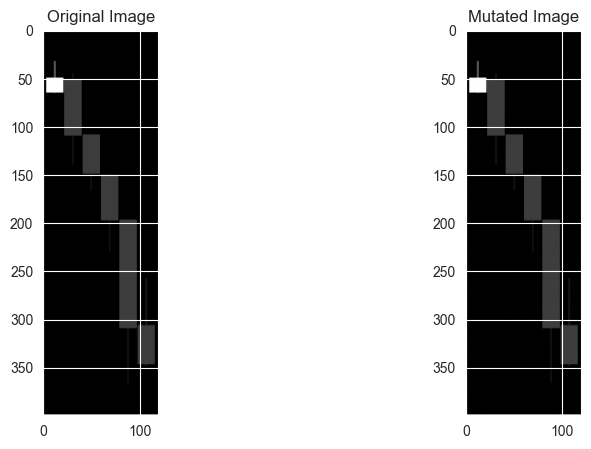

In [30]:
image = train_images[np.random.randint(0, len(train_images))]
mutated_image = mutation(image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(mutated_image.squeeze(), cmap='gray')
plt.title('Mutated Image')
plt.show()

In [31]:
def anneal(alpha, mask_a, d=2, lower_bound=2, upper_bound=10):
    alpha = alpha.copy()
    mask_b = np.random.choice([True, False], size=alpha.shape)
    mask = mask_a ^ mask_b
    step = np.random.randint(-d, d + 1, size=alpha.shape) / 225.
    start_h = np.random.randint(0, lower_bound)
    end_h = np.random.randint(alpha.shape[0] - upper_bound, alpha.shape[0])
    start_w = np.random.randint(0, lower_bound)
    end_w = np.random.randint(alpha.shape[1] - upper_bound, alpha.shape[1])
    masksliced = np.zeros(alpha.shape, dtype=bool)
    masksliced[start_h:end_h, start_w:end_w] = mask[start_h:end_h, start_w:end_w]
    # print(masksliced.shape)
    # print(alpha.shape)
    alpha[masksliced] += step[masksliced]
    return alpha

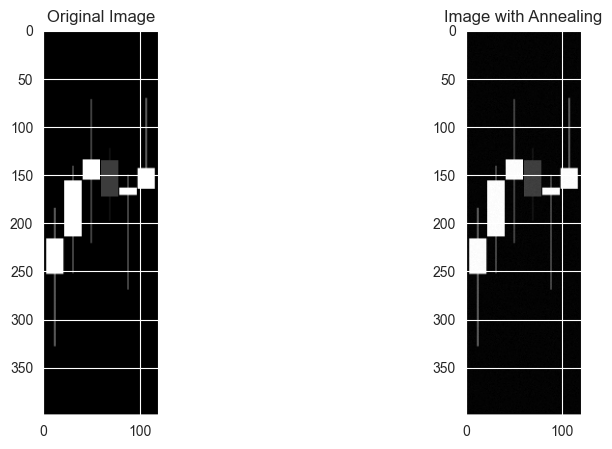

In [32]:
image = train_images[np.random.randint(0, len(train_images))]
mask_a = np.random.choice([True, False], size=image.shape)
anneal_image = anneal(image, mask_a)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(anneal_image.squeeze(), cmap='gray')
plt.title('Image with Annealing')
plt.show()

In [33]:
def calculate_recall(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    # print(y_test,y_pred_classes)
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    # print(recall)
    return recall

In [34]:
def fitness(X, Y, alpha_population, model, lambda_value=0.1):
    fitness_values = []
    for alpha, alpha_label in alpha_population:
        # print(alpha.shape)
        # print(alpha_label.shape)      
        # X_fitness = np.concatenate([X, alpha], axis=0)
        # Y_fitness = np.concatenate([Y, alpha_label], axis=0)
        # error = lambda_value * calculate_recall(model,X_fitness,Y_fitness)
        error = lambda_value * calculate_recall(model, alpha, alpha_label)
        alpha_fitness = 1 + error - np.linalg.norm(alpha)
        # print(error,np.linalg.norm(alpha),alpha_fitness)
        fitness_values.append(abs(np.max(alpha_fitness)))
    # best_index = np.argmax(fitness_values)
    # print(best_index)
    return fitness_values  #if needed put this too alpha_population[best_index]

In [35]:
X_sample = train_images[:4]
y_sample = train_labels[:4]
# print(X_sample.shape)
# print(y_sample.shape)
alpha_population_sample = [(np.expand_dims(x, axis=0), np.array([y])) for x, y in zip(X_sample, y_sample)]
# alpha_population_sample = [(np.random.rand(1,28, 28, 1), np.random.randint(0, 5, size=(1,))) for _ in range(3)]
# print(alpha_population_sample)
fitness_values = fitness(X_sample, y_sample, alpha_population_sample, model)
print("Fitness values for the sample alpha population:")
print(fitness_values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Fitness values for the sample alpha population:
[43.49375, 26.821875, 39.775, 31.65625]


D:\Pycharm Projects\ThesisFinal\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
def selection(parents, z=0.5):
    fitness_values = fitness(train_images, train_labels, parents, model)
    num_parents = len(parents)
    num_offspring = int(num_parents * z)
    selected_indices = np.random.choice(num_parents, num_offspring, replace=False,
                                        p=fitness_values / np.sum(fitness_values))
    offspring = [parents[i] for i in selected_indices]
    parents_next_gen = [parents[i] for i in range(num_parents) if i not in selected_indices]
    return parents_next_gen, offspring

In [37]:
# X_sample = train_images[:5]
# y_sample = train_labels[:5]
# model = train_cnn(X_sample, y_sample)
# maxpayoff = 0
# exitloop = False
# population = [(np.expand_dims(x, axis=0),np.array([y])) for x,y in zip(X_sample, y_sample)]
# # print(population)
# F_Xtrain = fitness(X_sample, y_sample, population,model)
# print(F_Xtrain)
# gen = 0

# best_index = np.argmax(F_Xtrain)
# print(best_index)
# acurr, currpayoff = population[best_index], F_Xtrain[best_index]  # what is the max show with the fitness example and what is this acurr
# # print(acurr[0],acurr[1])
# print(currpayoff)
# X_sample = np.concatenate([X_sample, acurr[0]], axis=0)
# y_sample = np.concatenate([y_sample, acurr[1]], axis=0)
# model = train_cnn(X_sample, y_sample) 

In [38]:
def twoplayergame_ga(Xtrain, Ytrain, maxiter=100):
    model = train_cnn(Xtrain, Ytrain)
    exitloop = False
    population = [(np.expand_dims(x, axis=0), np.array([y])) for x, y in zip(Xtrain, Ytrain)]
    F_Xtrain = fitness(Xtrain, Ytrain, population, model)
    maxpayoff = np.max(F_Xtrain)
    gen = 0
    while gen < maxiter and not exitloop:
        best_index = np.argmax(F_Xtrain)
        # print(F_Xtrain)
        acurr, currpayoff = population[best_index], F_Xtrain[best_index]
        Xcurr = np.concatenate([Xtrain, acurr[0]], axis=0)
        Ycurr = np.concatenate([Ytrain, acurr[1]], axis=0)
        model = train_cnn(Xcurr, Ycurr, epochs=1)
        print("The currpayoff is :", currpayoff)
        if abs(currpayoff - maxpayoff) < 0.1:  # the currpayoff issue is coming
            maxpayoff = currpayoff
            parents, offspring = selection(population, 0.5)

            new_offspring = []
            for i in range(0, len(offspring) - 1, 2):
                child1, child2 = crossover(np.squeeze(offspring[i][0], axis=0), np.squeeze(offspring[i + 1][0], axis=0))
                new_offspring.append((child1, offspring[i][1]))
                new_offspring.append((child2, offspring[i + 1][1]))

            curr_offspring = []
            for mutant, label in new_offspring:
                curr_offspring.append((np.expand_dims(mutation(mutant), axis=0), label))

            curr_population = parents + curr_offspring
            population = curr_population.copy()
            F_Xtrain = fitness(Xtrain, Ytrain, population, model)
        else:
            exitloop = True

        gen += 1

    final_index = np.argmax(F_Xtrain)
    acurr, maxpayoff = population[final_index], F_Xtrain[final_index]
    return acurr

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.1118
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8000 - loss: 0.5133
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 1.0000 - loss: 0.0339
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 1.0000 - loss: 2.5971e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.0723
The currpayoff is : 43.49375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.0936
The currpayoff is : 43.49375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.1122
The currpayoff is : 43.49375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1667 - loss: 2.0632
The currpayoff is : 43.59375
[3.]


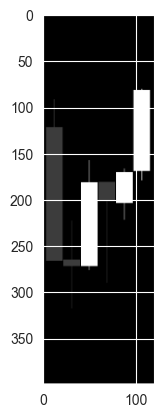

In [39]:
warnings.filterwarnings('ignore')
X_sample = train_images[:5]
y_sample = train_labels[:5]
acurr = twoplayergame_ga(X_sample, y_sample)
print(acurr[1])
plt.imshow(acurr[0].squeeze(), cmap='gray')

In [40]:
def twoplayergame_sa(Xtrain, Ytrain):
    model = train_cnn(Xtrain, Ytrain)
    maxpayoff = 0
    exitloop = False
    Tmax = 10
    Tmin = 5
    v = 5  # this should be 50
    p = 0.6
    mask = np.random.choice([True, False], size=Xtrain[0].shape)
    Tcurr = Tmax
    population = [(np.expand_dims(x, axis=0), np.array([y])) for x, y in zip(Xtrain, Ytrain)]
    random.shuffle(population)
    pop_size = len(population) // 3
    ac = population[:pop_size].copy()
    ag = population[pop_size:2 * pop_size].copy()
    an = population[2 * pop_size:].copy()
    evalc = fitness(Xtrain, Ytrain, ac, model)
    maxpayoff = max(fitness(Xtrain, Ytrain, ag, model))
    while not exitloop:
        evalg = fitness(Xtrain, Ytrain, ag, model)
        curr_index = np.argmax(evalg)
        currpayoff = evalg[curr_index]
        print("The current Payoff is:", currpayoff)
        if abs(currpayoff - maxpayoff) < 0.1:
            maxpayoff = currpayoff
            while Tcurr >= Tmin:
                i = 1
                while i <= v:
                    temp = []
                    for ele, label in ac:
                        temp.append((np.expand_dims(anneal(np.squeeze(ele, axis=0), mask), axis=0), label))
                    an = temp.copy()
                    evaln = fitness(Xtrain, Ytrain, an, model)
                    print(max(evaln), max(evalc), max(evalg))
                    if max(evaln) > max(evalc):
                        ac = an.copy()
                        evalc = evaln.copy()
                        if max(evalg) < max(evaln):
                            ag = an.copy()
                            evalg = evaln.copy()
                    else:
                        if np.random.random() <= np.exp((max(evaln) - max(evalc)) / Tcurr):
                            ac = an.copy()
                            evalc = evaln.copy()
                    i += 1
                Tcurr *= p
            ag = ac.copy()
        else:
            exitloop = True
    return ag[np.argmax(fitness(Xtrain, Ytrain, ag, model))]



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.0945
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.6000 - loss: 1.1758
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.9000 - loss: 0.2697
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 1.0000 - loss: 0.0959
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 1.0000 - loss: 0.0405
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The current Payoff is: 54.025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
55.24375 55.24375 54.025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/st

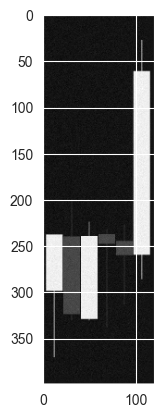

In [41]:
X_sample = train_images[:10]
y_sample = train_labels[:10]
ag = twoplayergame_sa(X_sample, y_sample)
# print(ag)
print(ag[1])
plt.imshow(ag[0].squeeze(), cmap='gray')

In [42]:
def generate_manipulated_data(images, labels, A_s):
    if len(A_s) == 1:
        alphas, alpha_labels = A_s[0][0], A_s[0][1]
    else:
        alphas, alpha_labels = list(zip(*A_s))
        # print(alphas)
        alphas = np.squeeze(alphas, axis=1)
        # print(alphas.shape)
        # print(alpha_labels)
        alpha_labels = np.squeeze(alpha_labels)
        # print(alpha_labels.shape)
    X_manipulated = np.concatenate([images, alphas], axis=0)
    Y_manipulated = np.concatenate([labels, alpha_labels], axis=0)
    return X_manipulated, Y_manipulated

In [43]:
X_sample = train_images[:100]
y_sample = train_labels[:100]
print(X_sample.shape)
print(y_sample.shape)
A_s = [(np.random.rand(1, 400, 120, 1), np.random.randint(0, 5, size=(1,))) for _ in range(10)]
# print(alpha_population_sample)
x_check, y_check = generate_manipulated_data(X_sample, y_sample, A_s)
print(x_check.shape)
print(y_check.shape)

(100, 400, 120, 1)
(100,)
(110, 400, 120, 1)
(110,)


In [44]:
def adversarial_manipulation(X_train, Y_train, X_test, Y_test, M, gametype):
    A_s = []
    for i in range(1, M + 1):
        if gametype == 'GA':
            a_i = twoplayergame_ga(X_train, Y_train)  #remove max_iter
        elif gametype == 'SA':
            a_i = twoplayergame_sa(X_train, Y_train)
        else:
            raise ValueError("Invalid gametype")
        A_s.append(a_i)

    X_train_manipulated, Y_train_manipulated = generate_manipulated_data(X_train, Y_train, A_s)
    X_test_manipulated, Y_test_manipulated = generate_manipulated_data(X_test, Y_test, A_s)

    cnn_model = train_cnn(X_train, Y_train, X_test, Y_test)
    f1_score_manipulated = calculate_f1_score(cnn_model, X_test_manipulated, Y_test_manipulated)

    cnn_model_secure = train_cnn(X_train_manipulated, Y_train_manipulated, X_test_manipulated, Y_test_manipulated)
    f1_score_secure = calculate_f1_score(cnn_model_secure, X_test_manipulated, Y_test_manipulated)

    return A_s, f1_score_manipulated, f1_score_secure

In [45]:
model = train_cnn(train_images[:1000], train_labels[:1000], test_images[:1000], test_labels[:1000])
f1_score_normal = calculate_f1_score(model, test_images, test_labels)

A_s, f1_score_manipulated, f1_score_secure = adversarial_manipulation(train_images[:1000], train_labels[:1000],
                                                                      test_images[:1000], test_labels[:1000], 1, 'SA')
print(f1_score_normal, f1_score_manipulated, f1_score_secure)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 714ms/step - accuracy: 0.3131 - loss: 2.0019 - val_accuracy: 0.3630 - val_loss: 1.6713
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 735ms/step - accuracy: 0.4402 - loss: 1.4843 - val_accuracy: 0.3640 - val_loss: 1.5970
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 657ms/step - accuracy: 0.4762 - loss: 1.3645 - val_accuracy: 0.3550 - val_loss: 1.5474
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 756ms/step - accuracy: 0.6406 - loss: 0.9354 - val_accuracy: 0.3390 - val_loss: 1.9102
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 666ms/step - accuracy: 0.8677 - loss: 0.4171 - val_accuracy: 0.3130 - val_loss: 2.7837
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step
[INFO] F1-Score is:0.2736


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 545ms/step - accuracy: 0.2791 - loss: 1.8752
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 551ms/step - accuracy: 0.4226 - loss: 1.5085
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 553ms/step - accuracy: 0.5209 - loss: 1.2274
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 552ms/step - accuracy: 0.7626 - loss: 0.6916
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 552ms/step - accuracy: 0.9481 - loss: 0.2096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3016 - loss: 1.9216 - val_accuracy: 0.3780 - val_loss: 1.6288
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 751ms/step - accuracy: 0.4138 - loss: 1.5169 - val_accuracy: 0.3630 - val_loss: 1.4957
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 745ms/step - accuracy: 0.5013 - loss: 1.2934 - val_accuracy: 0.3500 - val_loss: 1.6270
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 752ms/step - accuracy: 0.7479 - loss: 0.7454 - val_accuracy: 0.3350 - val_loss: 2.0614
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9180 - loss: 0.3061 - val_accuracy: 0.3410 - val_loss: 2.9487
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step
[INFO] F1-Score is:0.3172


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 743ms/step - accuracy: 0.3234 - loss: 1.9119 - val_accuracy: 0.3487 - val_loss: 1.6436
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 723ms/step - accuracy: 0.4500 - loss: 1.4953 - val_accuracy: 0.3646 - val_loss: 1.5985
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 781ms/step - accuracy: 0.4752 - loss: 1.3779 - val_accuracy: 0.3467 - val_loss: 1.5759
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6781 - loss: 0.9152 - val_accuracy: 0.3387 - val_loss: 1.8957
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 838ms/step - accuracy: 0.8801 - loss: 0.3988 - val_accuracy: 0.3357 - val_loss: 2.5757
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step
[INFO] F1-Score is:0.3144
0.2736386995902799 0.3171899517833577 0.31438876113757774


In [46]:
model = train_cnn(train_images[:1000], train_labels[:1000], test_images[:1000], test_labels[:1000])
f1_score_normal = calculate_f1_score(model, test_images, test_labels)

A_s, f1_score_manipulated, f1_score_secure = adversarial_manipulation(train_images[:1000], train_labels[:1000],
                                                                      test_images[:1000], test_labels[:1000], 1, 'GA')
print(f1_score_normal, f1_score_manipulated, f1_score_secure)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 759ms/step - accuracy: 0.3374 - loss: 1.8997 - val_accuracy: 0.3590 - val_loss: 1.5791
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 799ms/step - accuracy: 0.4479 - loss: 1.4771 - val_accuracy: 0.3560 - val_loss: 1.5524
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 819ms/step - accuracy: 0.5766 - loss: 1.1638 - val_accuracy: 0.3330 - val_loss: 1.7358
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 790ms/step - accuracy: 0.8186 - loss: 0.5940 - val_accuracy: 0.3390 - val_loss: 2.2489
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 799ms/step - accuracy: 0.9565 - loss: 0.2032 - val_accuracy: 0.3160 - val_loss: 3.1763
121/121 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step
[INFO] F1-Score is:0.2260


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 589ms/step - accuracy: 0.2861 - loss: 1.8594
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 599ms/step - accuracy: 0.4143 - loss: 1.5634
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 609ms/step - accuracy: 0.5439 - loss: 1.3030
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 569ms/step - accuracy: 0.7179 - loss: 0.8207
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 612ms/step - accuracy: 0.9080 - loss: 0.3241
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 618ms/step - accuracy: 0.3134 - loss: 1.7287
The currpayoff is : 68.9625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 576ms/step - accuracy: 0.3282 - loss: 1.8199
The currpayoff is : 69.0625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 585ms/step - accuracy: 0.3012 - loss: 1.8829
The currpayoff is : 69.0625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 567ms/step - accuracy: 0.3212 - loss: 1.8540
The currpayoff is : 67.875


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 775ms/step - accuracy: 0.2823 - loss: 2.2544 - val_accuracy: 0.3760 - val_loss: 1.6080
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 771ms/step - accuracy: 0.4161 - loss: 1.5111 - val_accuracy: 0.3810 - val_loss: 1.5021
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 795ms/step - accuracy: 0.4139 - loss: 1.4718 - val_accuracy: 0.3510 - val_loss: 1.4838
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 738ms/step - accuracy: 0.5463 - loss: 1.2243 - val_accuracy: 0.3600 - val_loss: 1.6227
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 810ms/step - accuracy: 0.7240 - loss: 0.7443 - val_accuracy: 0.3320 - val_loss: 2.0201
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step
[INFO] F1-Score is:0.2777


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 398, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 199, 59, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 197, 57, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 98, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 175616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │    22,478,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,498,824 (85.83 MB)

 Trainable params: 22,498,824 (85.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 851ms/step - accuracy: 0.3103 - loss: 1.7250 - val_accuracy: 0.3616 - val_loss: 1.7350
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 708ms/step - accuracy: 0.4113 - loss: 1.4828 - val_accuracy: 0.3477 - val_loss: 1.6052
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 735ms/step - accuracy: 0.5311 - loss: 1.2558 - val_accuracy: 0.3367 - val_loss: 1.6693
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 691ms/step - accuracy: 0.7771 - loss: 0.6455 - val_accuracy: 0.3127 - val_loss: 2.1674
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 727ms/step - accuracy: 0.9467 - loss: 0.2440 - val_accuracy: 0.3197 - val_loss: 3.2322
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step
[INFO] F1-Score is:0.2593
0.22602033813701886 0.27773403067520713 0.2593064502912259


In [47]:
# model = train_cnn(train_images ,train_labels ,test_images,test_labels)
# f1_score_normal = calculate_f1_score(model,test_images,test_labels)

# A_s, f1_score_manipulated, f1_score_secure = adversarial_manipulation(train_images,train_labels,test_images,test_labels, 1, 'GA')
# print(f1_score_normal, f1_score_manipulated, f1_score_secure)